In [4]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize
import warnings

In [5]:
def ratFunc(x, a, b, c, d): # rational function
    return a/(x+b)**c + d 

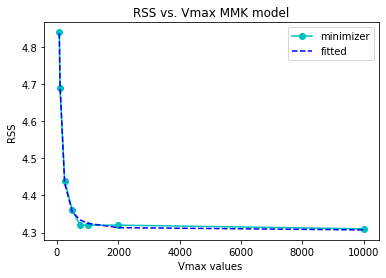

In [7]:
warnings.filterwarnings('ignore')    
#list with values calculated in pk_intra_mmk
VmaxList = [75, 100, 250, 500, 750, 1000, 2000, 10000]
RSSList = [4.84, 4.69, 4.44, 4.36, 4.32, 4.32, 4.32, 4.31]
  
aVmax = np.asarray(VmaxList)/10000; 
aRSS = np.asarray(RSSList)

#plot result
plt.plot(VmaxList,RSSList,'co-',label = 'minimizer')
plt.xlabel('Vmax values ')
plt.ylabel('RSS')

#perform the fit
p0 = (1, 1, 1, 1) # start with values near those we expect
params, cv = scipy.optimize.curve_fit(ratFunc, aVmax, aRSS, p0)
a, b, c, d = params
sampleRate = 20_000
tauSec = 1 / sampleRate

plt.plot(aVmax*10000, ratFunc(aVmax, a, b, c, d), 'b--', label="fitted")
plt.legend(loc='best')
comment = 'RSS vs. Vmax MMK model' 
plt.title(comment)
plt.show() 